# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharingПризнаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты.



In [201]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import traceback
%matplotlib inline

# Задание 1_загрузка файла

In [202]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Задание 2_основная статистика

In [204]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Задание 3
Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.


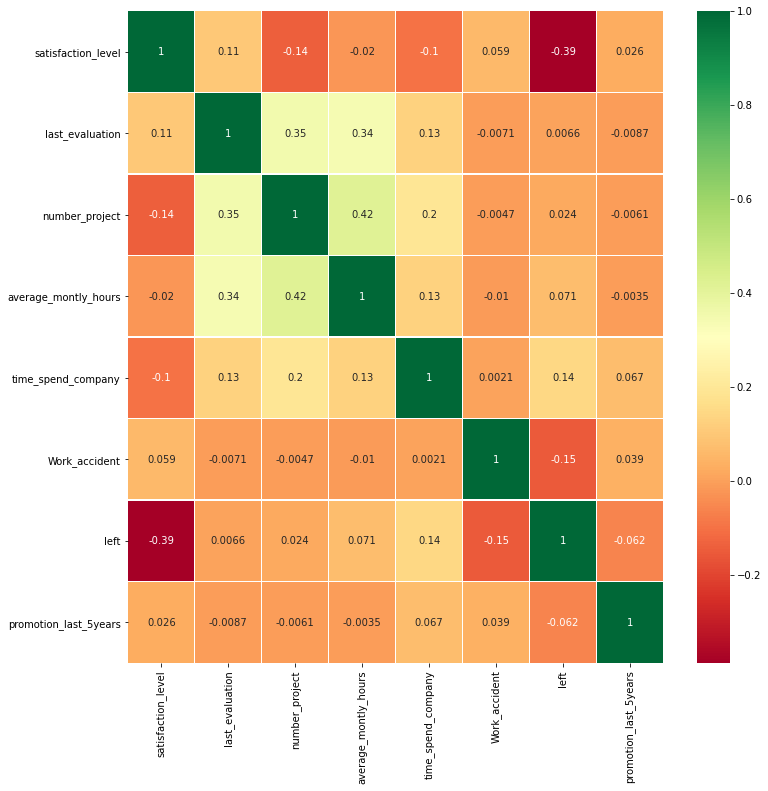

In [205]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

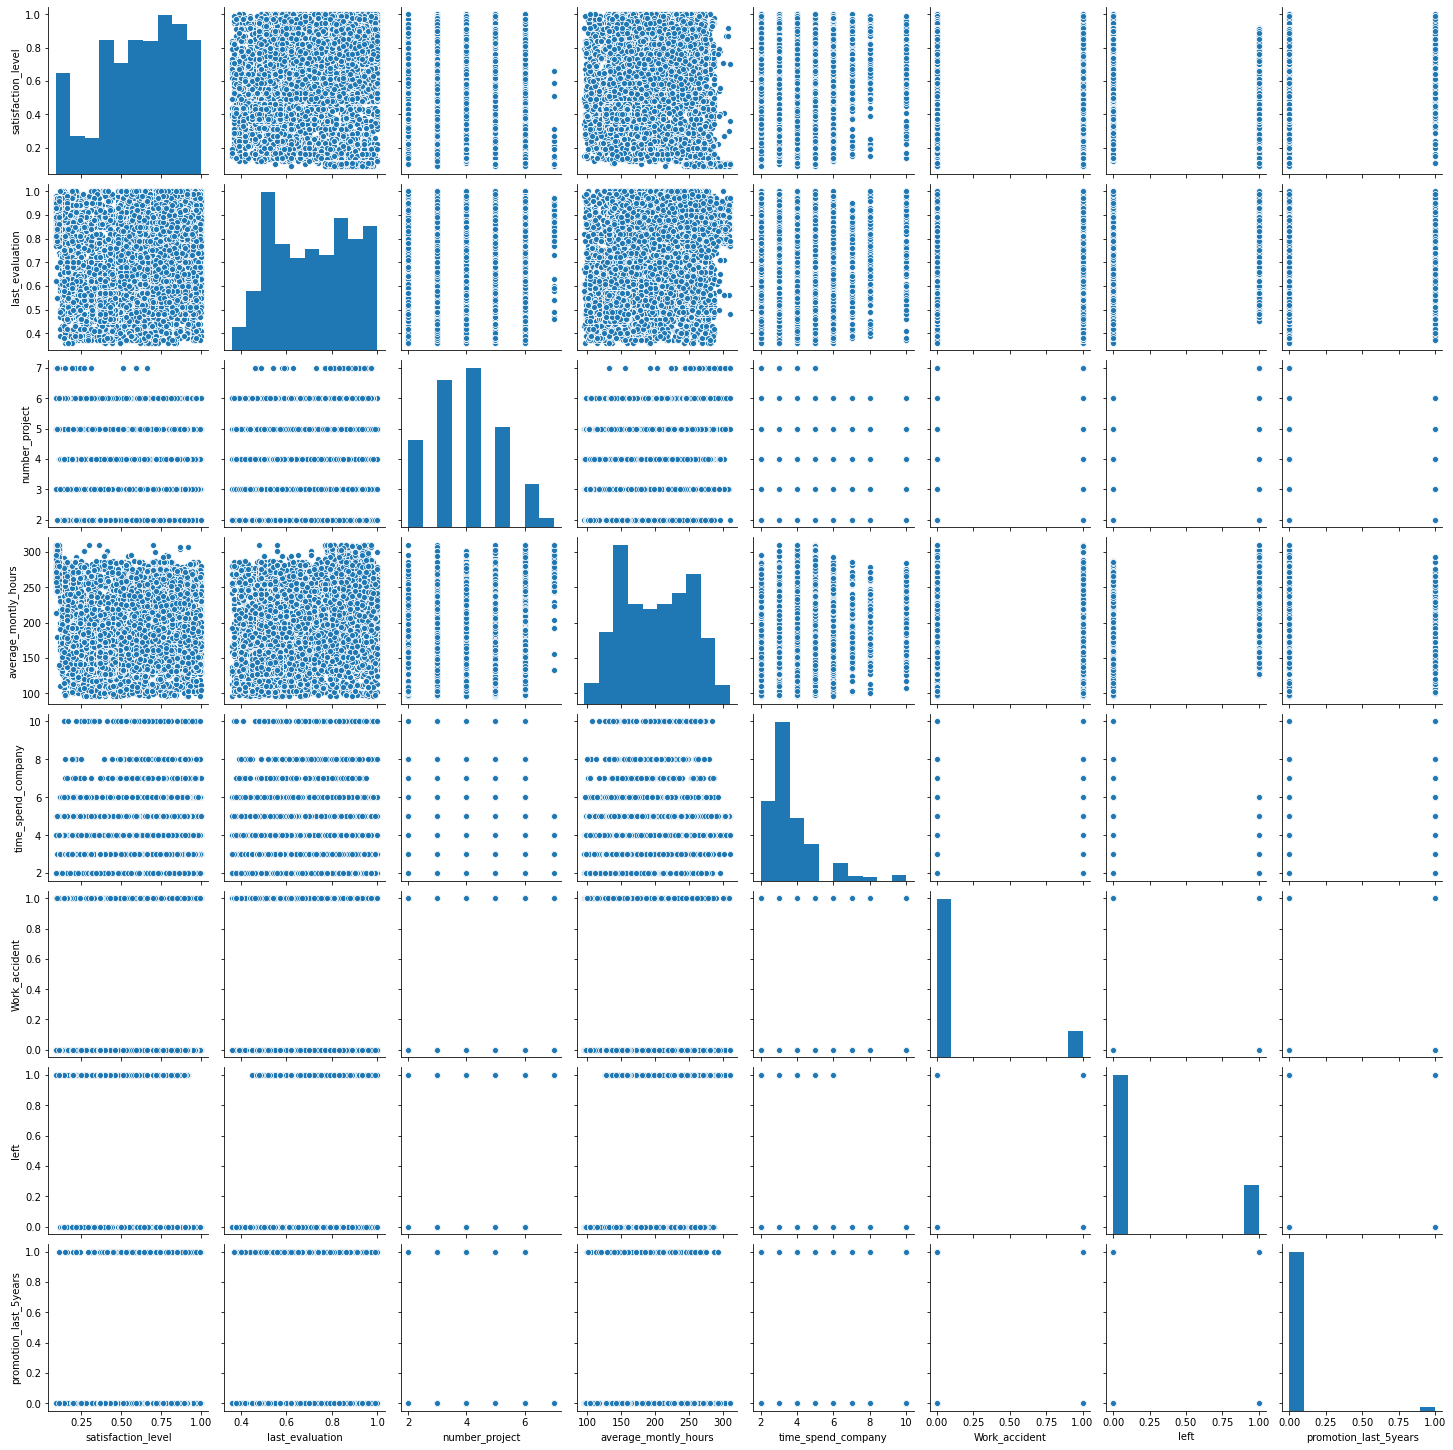

In [206]:
sns.pairplot(df)

In [207]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Вывод: Last_evaluation и average_monthly_hours зависят от number_project и имеют положительную корреляцию, а left и time_spend_company зависят от satisfaction_level имеет отрицательную корреляцию.  

# Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.


In [208]:
df_department=df['department'].value_counts().reset_index() 
df_department = df_department.rename(columns={'index': 'department', 'department': 'employees'})
df_department

,department,employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Больше всего работников работает в продажах 

# Задание 5
Показать распределение сотрудников по зарплатам.

In [209]:
df_salary = df.groupby(['salary']).count().reset_index() 
df_salary

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department
0,high,1237,1237,1237,1237,1237,1237,1237,1237,1237
1,low,7316,7316,7316,7316,7316,7316,7316,7316,7316
2,medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [210]:
df_salary[['salary', 'department']]

,salary,department
0,high,1237
1,low,7316
2,medium,6446


In [211]:
df.loc[lambda row: row.salary == 'low']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [212]:
df_dep = df.groupby(['department','salary']).count()
df_dep

satisfaction_level  last_evaluation  number_project  \
department  salary                                                        
IT          high                    83               83              83   
            low                    609              609             609   
            medium                 535              535             535   
RandD       high                    51               51              51   
            low                    364              364             364   
            medium                 372              372             372   
accounting  high                    74               74              74   
            low                    358              358             358   
            medium                 335              335             335   
hr          high                    45               45              45   
            low                    335              335             335   
            medium                 359              359             359   
management  high                   225              225             225   
            low                    180              180             180   
            medium                 225              225             225   
marketing   high                    80               80              80   
            low                    402              402             402   
            medium                 376              376             376   
product_mng high                    68               68              68   
            low                    451              451             451   
            medium                 383              383             383   
sales       high                   269              269             269   
            low                   2099             2099            2099   
            medium                1772             1772            1772   
support     high                   141              141             141   
            low                   1146             1146            1146   
            medium                 942              942             942   
technical   high                   201              201             201   
            low                   1372             1372            1372   
            medium                1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
department  salary                                                            
IT          high                      83                  83             83   
            low                      609                 609            609   
            medium                   535                 535            535   
RandD       high                      51                  51             51   
            low                      364                 364            364   
            medium                   372                 372            372   
accounting  high                      74                  74             74   
            low                      358                 358            358   
            medium                   335                 335            335   
hr          high                      45                  45             45   
            low                      335                 335            335   
            medium                   359                 359            359   
management  high                     225                 225            225   
            low                      180                 180            180   
            medium                   225                 225            225   
marketing   high                      80                  80             80   
            low                      402                 402            402   
            medium                   376                 376            376   
product_mng high                      6

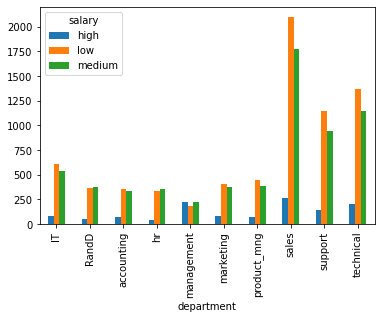

In [213]:
dep_group = df[['department', 'salary', 'left']]
dep_salary = dep_group.pivot_table('left', index = 'department', columns = 'salary', aggfunc = 'count')
dep_salary.plot.bar()

В продажах Sales больше всего сотрудников и распределение по зарплате там больше всего. 

# Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [214]:
df_1 = df[['average_montly_hours', 'salary']]
df_1

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low
...,...,...
14994,151,low
14995,160,low
14996,143,low
14997,280,low


In [215]:
df_high = df_1[['average_montly_hours']].loc[df_1.salary == 'high']
df_low = df_1[['average_montly_hours']].loc[df_1.salary == 'low']

In [216]:
alpha = 0.05
#Применяем двухсторонний двухвыборочный критерий Стьюдента
result = stats.ttest_ind(df_high['average_montly_hours'], 
                         df_low['average_montly_hours'], equal_var=False)
#ttest_ind для двух независимых выборок  
print(result)
if (result.pvalue < alpha):
    print('Отвергаем Н0 средние значений отличаются')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


In [217]:
import numpy as np
print(np.mean(df_high))
print(np.mean(df_low))

average_montly_hours    199.867421
dtype: float64
average_montly_hours    200.996583
dtype: float64


Вывод:statistic<0 значит средний значение выборки с high меньше, среднего значения low
pvalue>5% не отвергаем нулевую гипотезу. статистическая значимость отличий не значительная. 

# Задание 8
Рассчитать следующие показатели среди уволившихся (left) и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет (promotion_last_5years)

●Средняя степень удовлетворенности (satisfaction_level)

●Среднее количество проектов (number_projects)

In [218]:
df_4 = df[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']]

In [219]:
df_4

,left,promotion_last_5years,satisfaction_level,number_project
0,1,0,0.38,2
1,1,0,0.80,5
2,1,0,0.11,7
3,1,0,0.72,5
4,1,0,0.37,2
...,...,...,...,...
14994,1,0,0.40,2
14995,1,0,0.37,2
14996,1,0,0.37,2
14997,1,0,0.11,6


In [220]:
df_left = df_4.groupby(['left']).agg({'promotion_last_5years':'mean',
                                 'satisfaction_level':'mean',
                                'number_project':'mean'})
df_left.reset_index()

,left,promotion_last_5years,satisfaction_level,number_project
0,0,0.026251,0.666810,3.786664
1,1,0.005321,0.440098,3.855503


По средним показателям количество проектов не влияет на уволнения, что было видно, когда смотрели корреляцию.
Влияет удовлетворенность сотрудникови повышение за последние 5 лет. 

In [221]:
df_sum=df['left'].value_counts().sort_index()
df_sum.reset_index()

,index,left
0,0,11428
1,1,3571


In [222]:
df_left.groupby(np.arange(len(df_left))).mean()

,promotion_last_5years,satisfaction_level,number_project
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


In [223]:
df_sum1 = df_4.loc[0:].sum()
df_sum1.reset_index()

,index,0
0,left,3571.00
1,promotion_last_5years,319.00
2,satisfaction_level,9191.89
3,number_project,57042.00


In [224]:
df_5years = pd.DataFrame(df_4.groupby('left')['promotion_last_5years'].sum()).reset_index()
df_5years

,left,promotion_last_5years
0,0,300
1,1,19


In [225]:
df_level = pd.DataFrame(df_4.groupby('left')['satisfaction_level'].sum()).reset_index()
df_level

,left,satisfaction_level
0,0,7620.30
1,1,1571.59


In [226]:
df_num = pd.DataFrame(df_4.groupby('left')['number_project'].sum()).reset_index()
df_num

,left,number_project
0,0,43274
1,1,13768


In [227]:
df_all = pd.concat([df_sum, df_5years, df_level,  df_num], axis=1)
df_all

,left,left,promotion_last_5years,left,satisfaction_level,left,number_project
0,11428,0,300,0,7620.30,0,43274
1,3571,1,19,1,1571.59,1,13768


In [228]:
df_all = pd.concat([df_5years, df_level,  df_num], axis=1)
df_all

,left,promotion_last_5years,left,satisfaction_level,left,number_project
0,0,300,0,7620.30,0,43274
1,1,19,1,1571.59,1,13768


In [236]:
a0 = (df[df.left == 1][df.promotion_last_5years == 1]['promotion_last_5years'].count()) 
b0 = (df[df.left == 1]['left'].count())
c0 = df[df.left == 1]['satisfaction_level'].mean()
d0 = df[df.left == 1]['number_project'].mean()

a1 = (df[df.left == 0][df.promotion_last_5years == 1]['promotion_last_5years'].count()) 
b1 = (df[df.left == 0]['left'].count())
c1 = df[df.left == 0]['satisfaction_level'].mean()
d1 = df[df.left == 0]['number_project'].mean()


print(f'Среди уволившихся сотрудников:')
print(f'Доля сотрудников с повышением за последние 5 лет: {round(a0/b0, 3)*100}%')
print(f'Средний уровень удовлетворенности: {round(c0, 1)}')
print(f'Среднее количество проектов: {round(d0, 1)}')

print(f'\nСреди оставшихся сотрудников:')
print(f'Доля сотрудников с повышением за последние 5 лет: {round(a1/b1, 3)*100}%')
print(f'Средний уровень удовлетворенности: {round(c1, 1)}')
print(f'Среднее количество проектов: {round(d1, 1)}')


Среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.5%
Средний уровень удовлетворенности: 0.4
Среднее количество проектов: 3.9

Среди оставшихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 2.6%
Средний уровень удовлетворенности: 0.7
Среднее количество проектов: 3.8


<ipython-input-236-5ac172ecc559>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a0 = (df[df.left == 1][df.promotion_last_5years == 1]['promotion_last_5years'].count())
<ipython-input-236-5ac172ecc559>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a1 = (df[df.left == 0][df.promotion_last_5years == 1]['promotion_last_5years'].count())


Вывод: Доля сотрудников с повышением за последние 5 лет у уволивщихся = 0.5%, меньше  2.6% (чем у оставщихся). И уровень удовлетворености 0.4 против 0.7. можем предположить, что данные факторы повлияли на увольнение.

# Задание 9
Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

In [94]:
X = df[['satisfaction_level','last_evaluation', 'number_project', 
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years']].dropna()
Y = df['left'].dropna()

In [112]:
# разделяем выборку на тренировочную и тестовую
#тренируемся на известных данных. часть данных для проверки, 
#а часть для изучения. так делим модель
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [113]:
len(y_test)

3000

In [114]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#создаем класс
lda = LinearDiscriminantAnalysis()
#обучаем данные на тренировочных данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [115]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
# расчет точности (accuracy_score)  - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))
#точность модели показывает
#если  классы несбалансированные, то точность будет плохой метрикой
#использовать другие метрики в таком случае 

0.7533333333333333

In [117]:
# коэффициенты дискриминатных линий (КДЛ)

#КДЛ, чем больше число по модулю, тем сильнее влияет данный показатель на
#определение влияния
#alcalinity_of_ash показатель больше всего влияет на
#пренадлежность данного объекта к той или иной категории
lda.coef_


array([[-4.57147175,  0.63783468, -0.22366351,  0.00483694,  0.22384028,
        -1.05220355, -1.11972289]])

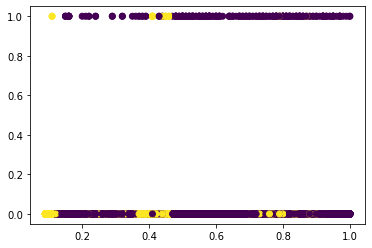

In [119]:
# визуализируем дискриминантную линию только по 2 признакам, те что больше влияют из КДЛ
plt.scatter(X_train['satisfaction_level'], X_train['promotion_last_5years'], c=y_train)
plt.show()
#сложно тут разделить визуально, точки пересекаются

Вывод: расчет точности составил 76%. коэффициенты дискриминатных линий (КДЛ) показывает, что наибольшее влияние оказывает: 
'satisfaction_level', остальные показатели в меньшей степени.

# Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку